In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_county = pd.read_csv('County_Zhvi_AllHomes.csv',encoding='latin-1')
df_zipcode = pd.read_csv('Zip_Zhvi_AllHomes.csv',encoding='latin-1')

In [8]:
df_county = df_county[df_county.State =='IN']
df_zipcode = df_zipcode[df_zipcode.State =='IN']

In [9]:
df_county.head()

,RegionID,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
54,1165,Marion County,IN,Indianapolis-Carmel-Anderson,18,97,55,NaN,NaN,NaN,...,143487,143814,144147,144491,145655,146936,148115,148663,149503,151010
130,221,Lake County,IN,Chicago-Naperville-Elgin,18,89,131,NaN,NaN,NaN,...,153958,154751,155672,156600,157517,158590,159567,160530,161321,162255
181,367,Allen County,IN,Fort Wayne,18,3,182,NaN,NaN,NaN,...,143118,143855,144470,145234,146110,147064,147891,148720,149677,150845
234,2318,Hamilton County,IN,Indianapolis-Carmel-Anderson,18,57,235,NaN,NaN,NaN,...,285382,285833,286661,287659,288708,289518,290281,291492,292851,294430
244,2849,Saint Joseph County,IN,South Bend-Mishawaka,18,141,245,NaN,NaN,NaN,...,129993,130867,131349,131888,132293,132972,133437,133882,133814,134133


In [10]:
df_zipcode.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
173,78823,47906,West Lafayette,IN,Lafayette-West Lafayette,Tippecanoe County,174,NaN,NaN,NaN,...,223048,224264,224772,225786,227316,229164,230635,231927,233334,235047
185,78085,46307,Crown Point,IN,Chicago-Naperville-Elgin,Lake County,186,NaN,NaN,NaN,...,234992,235984,237332,238586,239685,240750,241646,242665,243528,244670
242,78042,46227,Indianapolis,IN,Indianapolis-Carmel-Anderson,Marion County,243,NaN,NaN,NaN,...,149714,150001,150358,150708,152158,153644,154971,155486,156278,157842
394,77986,46143,Greenwood,IN,Indianapolis-Carmel-Anderson,Johnson County,395,NaN,NaN,NaN,...,204271,204623,205365,206028,207361,208763,209879,210516,211173,212490
561,78467,47150,New Albany,IN,Louisville/Jefferson County,Floyd County,562,NaN,NaN,NaN,...,147593,148714,149583,150842,151959,152694,153069,153481,153783,154140


In [11]:
df_zipcode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 173 to 30449
Columns: 294 entries, RegionID to 2020-02
dtypes: float64(261), int64(29), object(4)
memory usage: 1.8+ MB


In [24]:
def get_datetimes(df):
    """
        change the column data type from str to datetime 
        input: DataFrame with column names with time and others
        return: the datetime index
    """
    border = list(df.columns).index('SizeRank')+1#find the first time column
    return pd.to_datetime(df.columns.values[border:], format='%Y-%m')

In [25]:
time = get_datetimes(df_zipcode)

In [15]:
time[-26:]

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01'],
              dtype='datetime64[ns]', freq=None)

Let us see the trend from 2018.

In [26]:
df_zipcode_recent = pd.DataFrame()
df_zipcode_recent['RegionName']= df_zipcode.RegionName
df_zipcode_recent['CountyName']= df_zipcode.CountyName
df_zipcode_recent[time[-26:]] = df_zipcode[df_zipcode.columns[-26:]]

In [29]:
df_zipcode_available = pd.DataFrame()
df_zipcode_available['RegionName']= df_zipcode.RegionName
df_zipcode_available['CountyName']= df_zipcode.CountyName
border = list(df_zipcode.columns).index('SizeRank')+1
df_zipcode_available[time] = df_zipcode[df_zipcode.columns[border:]]

In [31]:
zipcode_county = df_zipcode_recent[df_zipcode_recent.columns[:2]]
zipcode_county

,RegionName,CountyName
173,47906,Tippecanoe County
185,46307,Lake County
242,46227,Marion County
394,46143,Johnson County
561,47150,Floyd County
...,...,...
30397,47683,Gibson County
30440,47556,Dubois County
30443,47986,Benton County
30448,46942,Cass County


In [29]:
df_zipcode_price2018 = df_zipcode_recent[df_zipcode_recent.columns[2:]].T
df_zipcode_price2018.head()
df_zipcode_price2018.columns = zipcode_county.RegionName

In [30]:
df_zipcode_price2018.head()

RegionName,47906,46307,46227,46143,47150,47130,46032,47401,46360,47374,...,47457,46921,46170,46047,46912,47683,47556,47986,46942,47107
2018-01-01 00:00:00,212172,217546,134629,189424,135475,134648,325769,245728,118066,90187,...,60529,56115,83604,71805,68600,40974,134892,55785,68026,69853
2018-02-01 00:00:00,213674,218473,135088,189677,136586,136867,327904,247111,118762,90201,...,61801,55423,84133,70489,69662,40795,136144,56145,67780,68686
2018-03-01 00:00:00,214966,219374,136299,190297,137566,139136,329751,248162,119211,90121,...,63078,55272,84809,69911,71043,40324,136670,56462,67695,67590
2018-04-01 00:00:00,215693,220697,138015,191324,137936,140333,331775,249268,119985,90049,...,63787,55178,85711,70098,72335,40224,136798,57246,67924,67351
2018-05-01 00:00:00,215968,222033,139239,192728,138156,141230,332551,250401,120510,90203,...,63865,55678,86330,70177,73359,40391,137089,57276,68670,67533


In [32]:
df_zipcode_price = df_zipcode_available[df_zipcode_available.columns[2:]].T
df_zipcode_price.head()
df_zipcode_price.columns = zipcode_county.RegionName

In [37]:
zipcode_county.query('CountyName == "Marion County"')

,RegionName,CountyName
242,46227,Marion County
1156,46226,Marion County
1358,46220,Marion County
1399,46237,Marion County
1507,46254,Marion County
1924,46219,Marion County
1966,46224,Marion County
2011,46203,Marion County
2168,46260,Marion County
2637,46222,Marion County


In [39]:
df_zipcode_price[46227].isna().sum()

40

In [43]:
df_zipcode_price[46227][40:]

1999-08-01     81013.0
1999-09-01     81574.0
1999-10-01     81556.0
1999-11-01     81807.0
1999-12-01     82103.0
                ...   
2019-10-01    153644.0
2019-11-01    154971.0
2019-12-01    155486.0
2020-01-01    156278.0
2020-02-01    157842.0
Name: 46227, Length: 247, dtype: float64

In [44]:
zipcode_county.query('RegionName == 46227')

,RegionName,CountyName
242,46227,Marion County


In [45]:
pd.Series(zipcode_county.query('RegionName == 46227').CountyName).iloc[0]# +', '+ str(47906)

'Marion County'

Text(0.5, 1.0, 'Marion County, 46227, housing price trend')

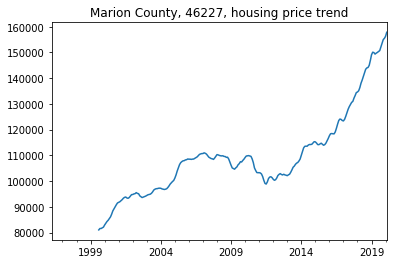

In [47]:
df_zipcode_price[46227].plot()
county = pd.Series(zipcode_county.query('RegionName == 46227').CountyName).iloc[0]

plt.title(county +', '+ str(46227) + ', housing price trend')

In [49]:
df_county_available = pd.DataFrame()
df_county_available['RegionName']= df_county.RegionName
# df_county_available['CountyName']= df_county.CountyName
border = list(df_county.columns).index('SizeRank')+1
df_county_available[time] = df_county[df_county.columns[border:]]

In [52]:
df_county_available.set_index('RegionName', inplace = True)

In [55]:
df_county_available.loc['Marion County'].isna().sum()

40

In [58]:
df_county_available.loc['Marion County']

1996-04-01         NaN
1996-05-01         NaN
1996-06-01         NaN
1996-07-01         NaN
1996-08-01         NaN
                ...   
2019-10-01    146936.0
2019-11-01    148115.0
2019-12-01    148663.0
2020-01-01    149503.0
2020-02-01    151010.0
Name: Marion County, Length: 287, dtype: float64

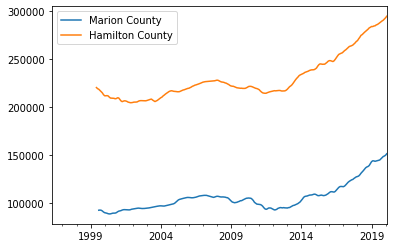

In [63]:
df_county_available.loc['Marion County'].plot()
df_county_available.loc['Hamilton County'].plot()
plt.legend()
# county = pd.Series(zipcode_county.query('RegionName == 46227').CountyName).iloc[0]

# plt.title(county +', '+ str(46227) + ', housing price trend')